In [27]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib as ta
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

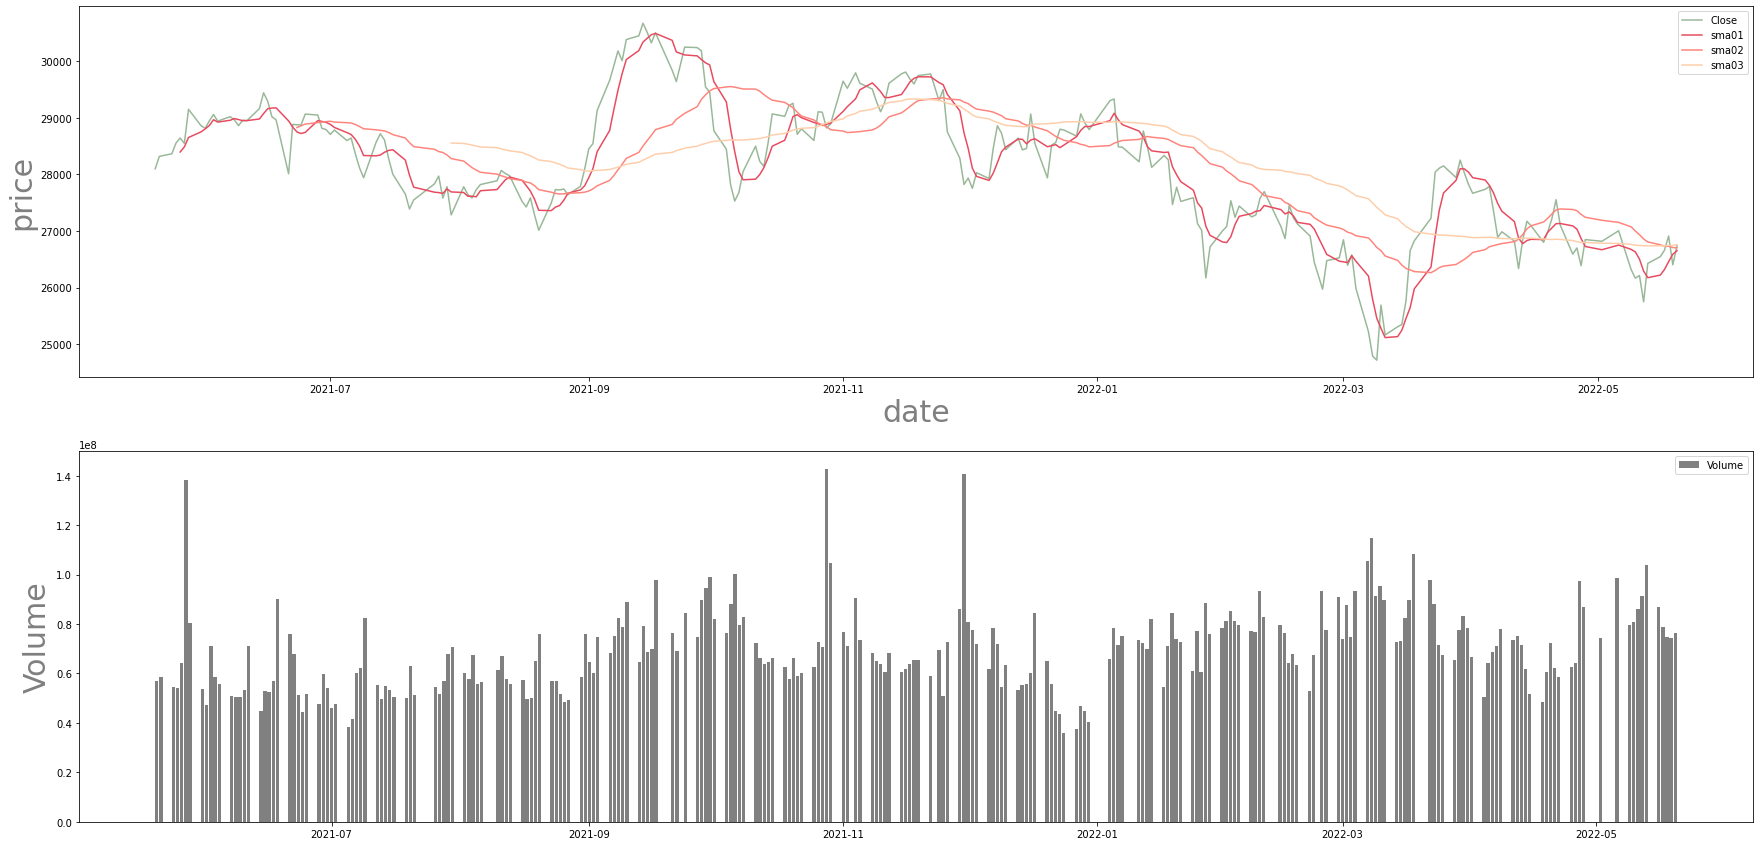

In [58]:
#日経平均の取得
start = '2021-05-20'
end = '2022-05-20'

df = data.DataReader('^N225', 'yahoo', start, end)

date = df.index
close = df['Adj Close']

#移動平均の設定
span01 = 5
span02 = 25
span03 = 50
df['sma01']= close.rolling(window=span01).mean()
df['sma02']= close.rolling(window=span02).mean()
df['sma03']= close.rolling(window=span03).mean() 
   
#日経平均と移動平均（5,25,50日）+出来高を図化
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date, close,label='Close', color= '#99b898')
plt.plot(date, df['sma01'],label= 'sma01',color= '#e84a5f')
plt.plot(date, df['sma02'],label= 'sma02',color= '#ff847c')
plt.plot(date, df['sma03'],label= 'sma03',color= '#feceab')

plt.title('', color= 'black', size= 40, loc= 'center' )
plt.xlabel('date', color= 'grey',size= 30)
plt.ylabel('price', color= 'grey',size= 30)
plt.legend()


plt.subplot(2,1,2)
plt.bar(date, df['Volume'],label= 'Volume',color= 'grey')
plt.ylabel('Volume', color= 'grey',size= 30)
plt.legend()
    

In [59]:
df

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2021-05-20,28176.869141,27821.960938,27875.500000,28098.250000,56800000,28098.250000,NaN,NaN,NaN
2021-05-21,28411.560547,28193.029297,28269.609375,28317.830078,58700000,28317.830078,NaN,NaN,NaN
2021-05-24,28584.179688,28212.320312,28212.320312,28364.609375,54700000,28364.609375,NaN,NaN,NaN
2021-05-25,28576.970703,28443.740234,28516.990234,28553.980469,54000000,28553.980469,NaN,NaN,NaN
2021-05-26,28710.830078,28396.619141,28396.619141,28642.189453,64200000,28642.189453,28395.371875,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-16,26836.960938,26438.609375,26753.369141,26547.050781,87000000,26547.050781,26220.832422,26756.873359,26739.239492
2022-05-17,26709.259766,26440.619141,26555.230469,26659.750000,78900000,26659.750000,26319.362500,26729.251328,26735.540078
2022-05-18,27053.179688,26741.339844,26826.820312,26911.199219,74700000,26911.199219,26458.874219,26730.156484,26745.903477


In [15]:
df['macd'], df['macdsignal'], df['macdhist']=ta.MACD(close, fastperiod=12, 
                                                     slowperiod=26, signalperiod=9)

In [18]:
df.fillna(0)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-03,22312.439453,22154.970703,22266.910156,22306.480469,51700000,22306.480469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-06,22734.109375,22325.750000,22341.269531,22714.439453,58000000,22714.439453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-07,22742.279297,22540.439453,22649.900391,22614.689453,62700000,22614.689453,22380.660156,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,29174.169922,28992.740234,29137.300781,29066.179688,51600000,29066.179688,28742.272266,28888.726562,28871.859102,19.242067,26.104254,-6.862187
2021-06-28,29121.279297,28984.929688,29112.660156,29048.019531,47700000,29048.019531,28949.690234,28916.062969,28857.787305,29.375149,26.758433,2.616716
2021-06-29,28951.679688,28735.550781,28927.439453,28812.609375,59700000,28812.609375,28935.385937,28926.408125,28841.619687,18.200255,25.046797,-6.846542


In [22]:
df.index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-13', '2020-07-14',
               ...
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', name='Date', length=245, freq=None)

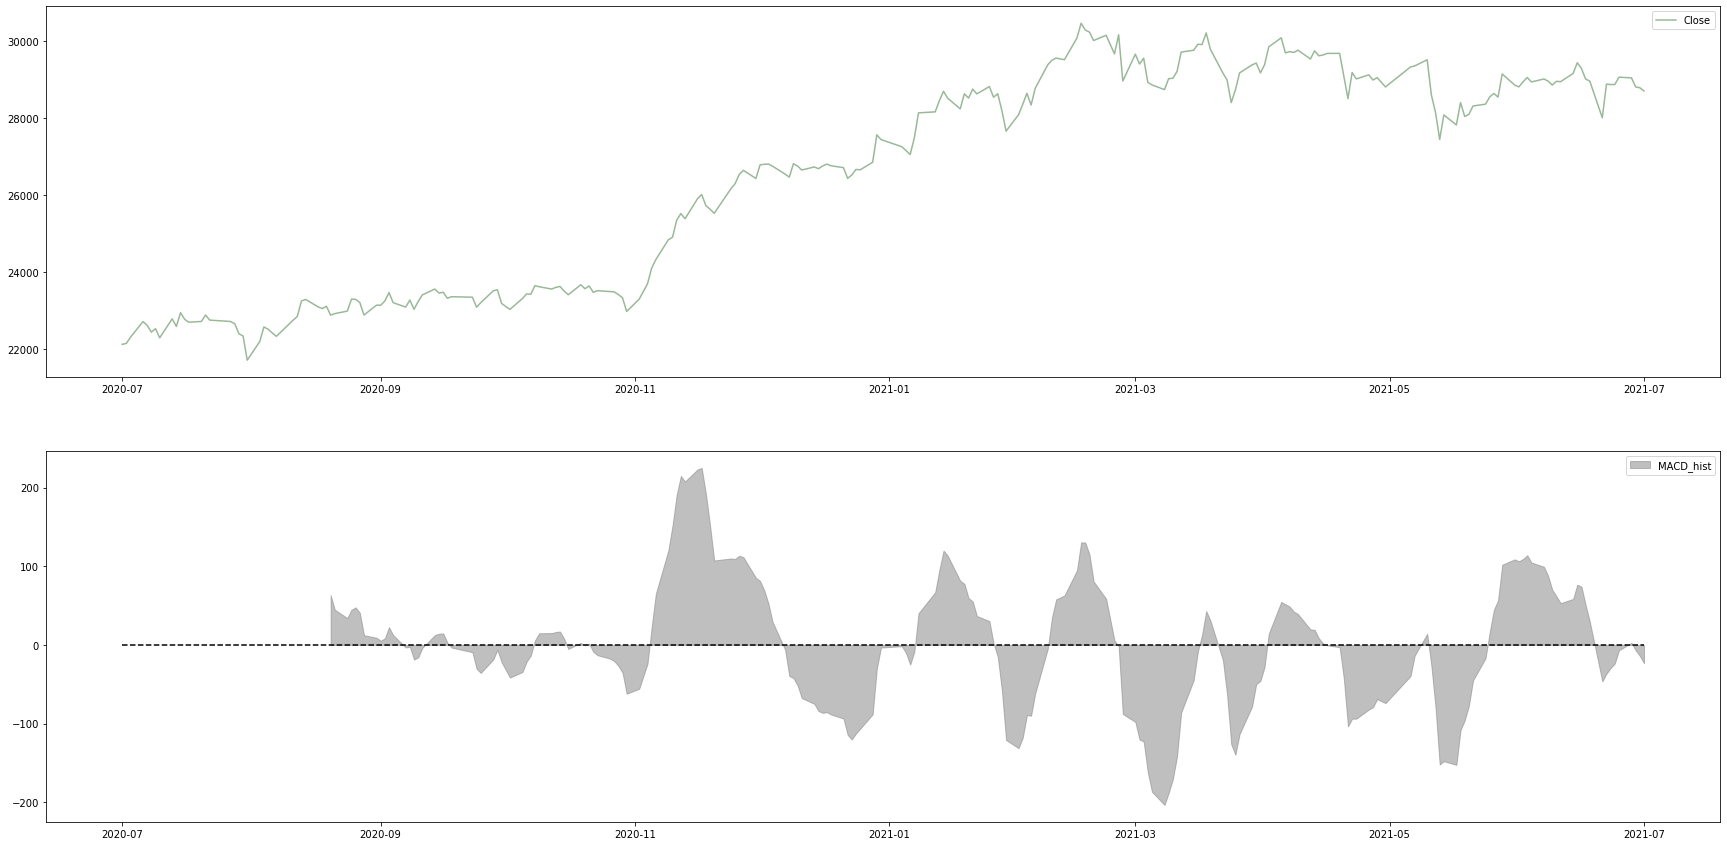

In [42]:
import datetime

#MACD
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date, close,label='Close', color= '#99b898')
plt.legend()


plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color= 'grey', alpha= 0.5, label= 'MACD_hist')
plt.hlines(0,date[0],date[-1],'black',linestyles='dashed')
# plt.hlines(0, start, end, "gray", linestyles="dashed")
plt.legend()
    

In [44]:
df['RSI'] = ta.RSI(close, timeperiod=span02)

In [46]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2021-06-25,29174.169922,28992.740234,29137.300781,29066.179688,51600000,29066.179688,28742.272266,28888.726562,28871.859102,19.242067,26.104254,-6.862187,51.439067
2021-06-28,29121.279297,28984.929688,29112.660156,29048.019531,47700000,29048.019531,28949.690234,28916.062969,28857.787305,29.375149,26.758433,2.616716,51.284033
2021-06-29,28951.679688,28735.550781,28927.439453,28812.609375,59700000,28812.609375,28935.385937,28926.408125,28841.619687,18.200255,25.046797,-6.846542,49.278516
2021-06-30,28998.990234,28779.759766,28896.310547,28791.529297,54000000,28791.529297,28918.713672,28932.381719,28824.596484,7.555985,21.548635,-13.992650,49.099415
2021-07-01,28833.169922,28624.800781,28832.410156,28707.039062,45900000,28707.039062,28885.075391,28938.702891,28805.069883,-7.609613,15.716985,-23.326598,48.365514


In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859,21714.246094,NaN,NaN,NaN,NaN,NaN,NaN


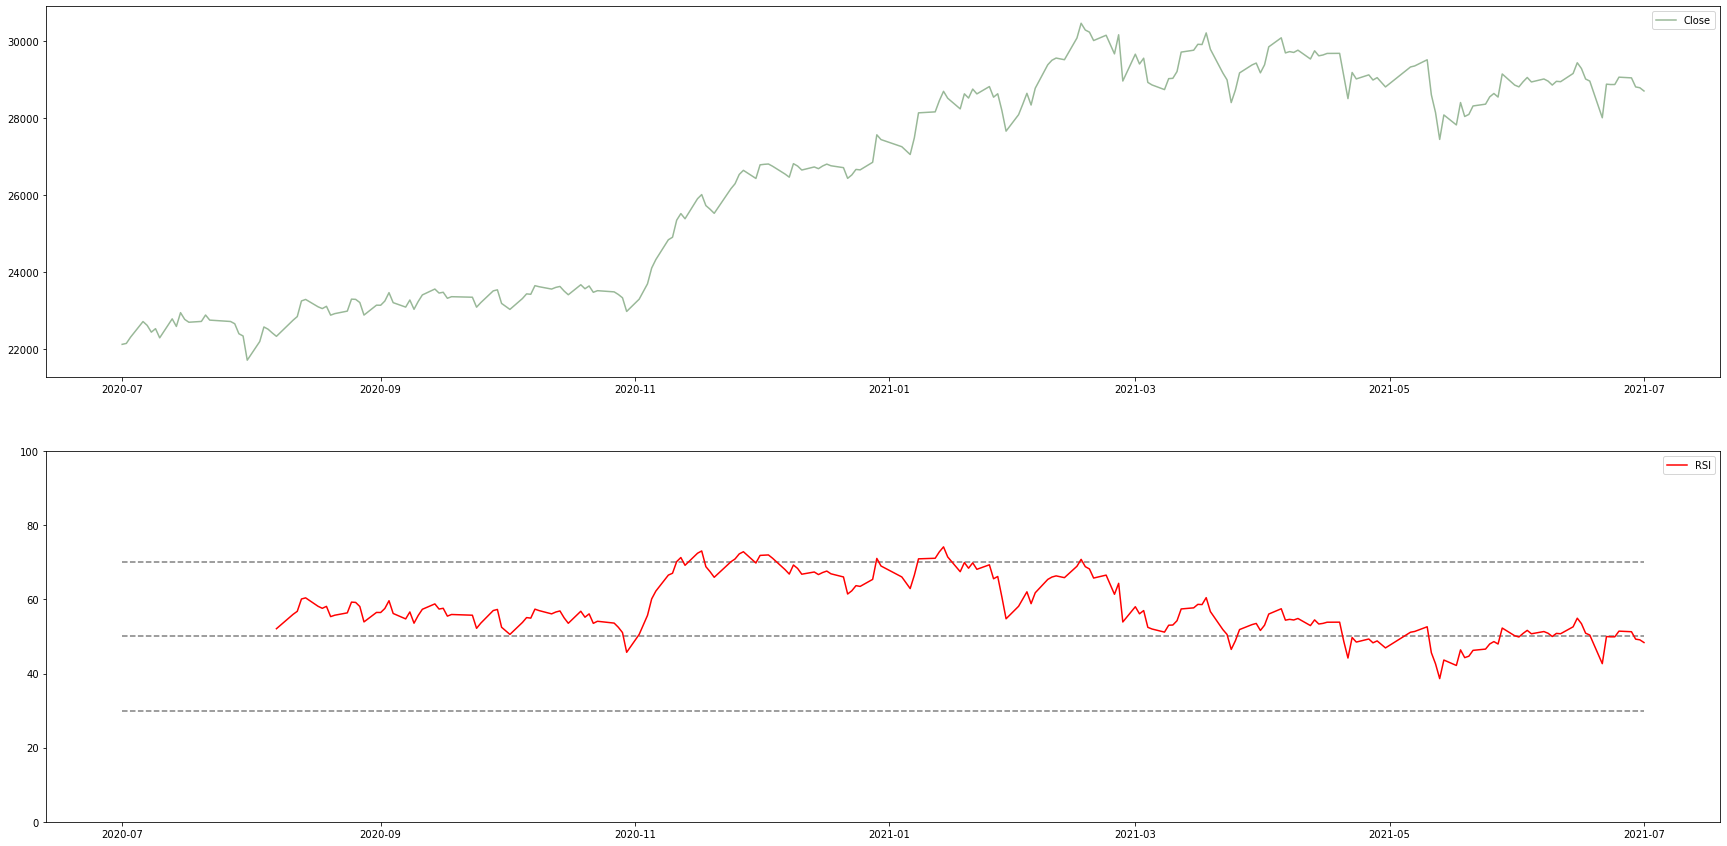

In [48]:
#RSI
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date, close,label='Close', color= '#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date, df['RSI'], label= 'RSI',color= 'red')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], date[0], date[-1], "gray", linestyles="dashed")
plt.legend()

In [49]:
df['upper'],df['middle'],df['lower'] = ta.BBANDS(close, timeperiod = span02,
                                                 nbdevup=2, nbdevdn=2, matype=0)

In [50]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2021-06-25,29174.169922,28992.740234,29137.300781,29066.179688,51600000,29066.179688,28742.272266,28888.726562,28871.859102,19.242067,26.104254,-6.862187,51.439067,29464.301861,28888.726562,28313.151264
2021-06-28,29121.279297,28984.929688,29112.660156,29048.019531,47700000,29048.019531,28949.690234,28916.062969,28857.787305,29.375149,26.758433,2.616716,51.284033,29453.097303,28916.062969,28379.028635
2021-06-29,28951.679688,28735.550781,28927.439453,28812.609375,59700000,28812.609375,28935.385937,28926.408125,28841.619687,18.200255,25.046797,-6.846542,49.278516,29444.784062,28926.408125,28408.032188
2021-06-30,28998.990234,28779.759766,28896.310547,28791.529297,54000000,28791.529297,28918.713672,28932.381719,28824.596484,7.555985,21.548635,-13.992650,49.099415,29440.866531,28932.381719,28423.896907
2021-07-01,28833.169922,28624.800781,28832.410156,28707.039062,45900000,28707.039062,28885.075391,28938.702891,28805.069883,-7.609613,15.716985,-23.326598,48.365514,29431.659092,28938.702891,28445.746689


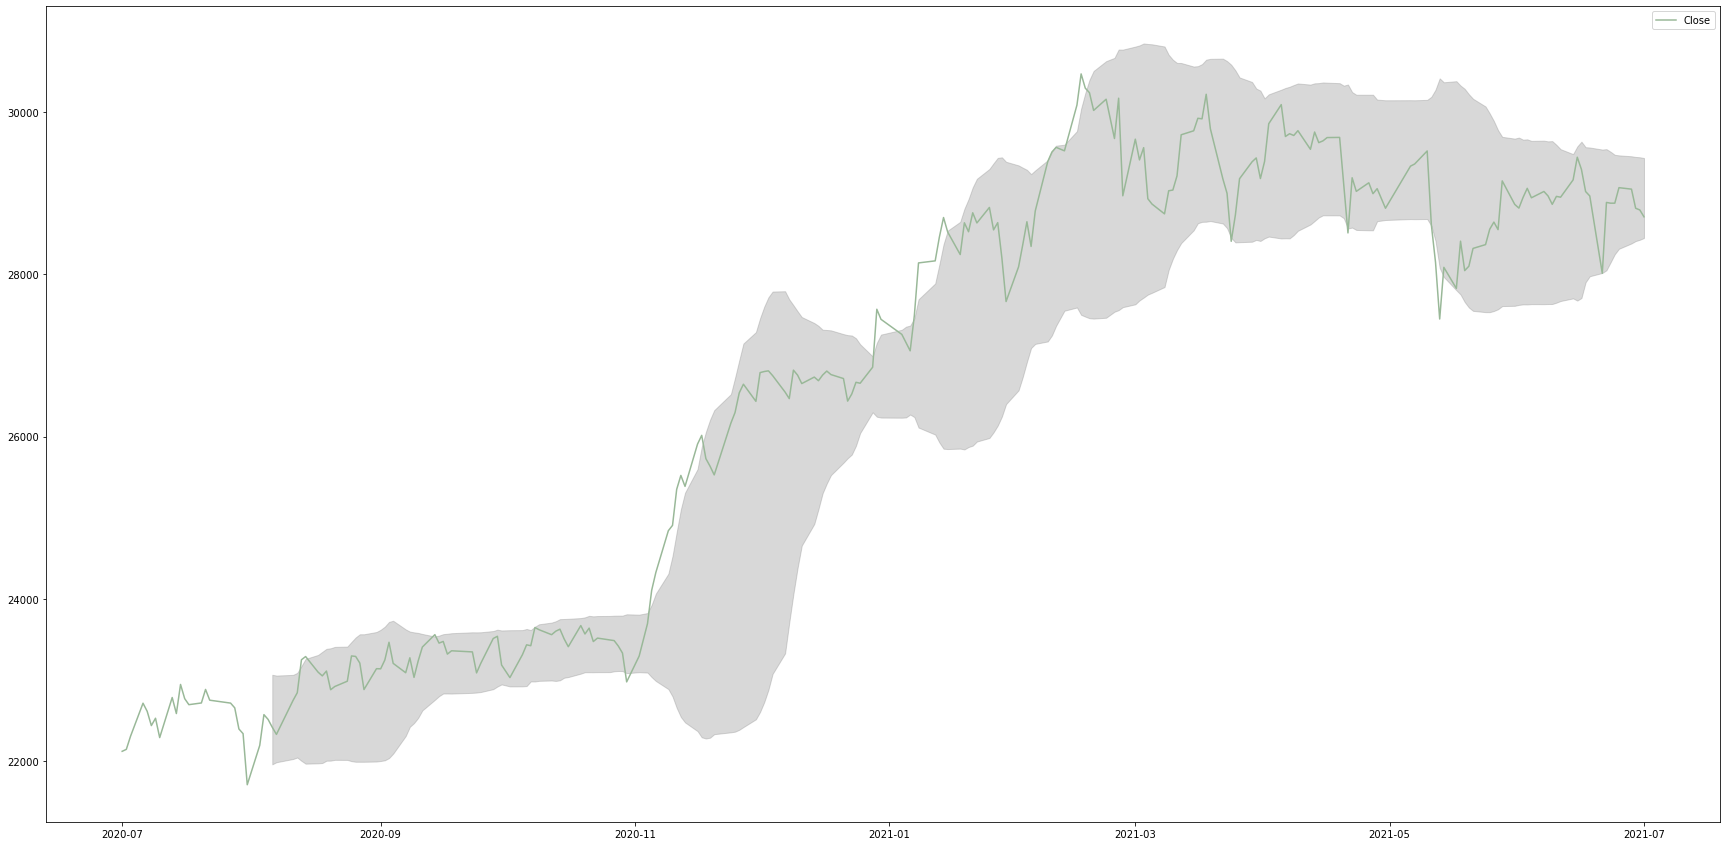

In [52]:
#B-BAND
plt.figure(figsize=(30, 15))
plt.plot(date, close, label = 'Close', color = '#99b898')
plt.fill_between(date, df['upper'],df['lower'], color = 'gray', alpha = 0.3)
plt.legend()

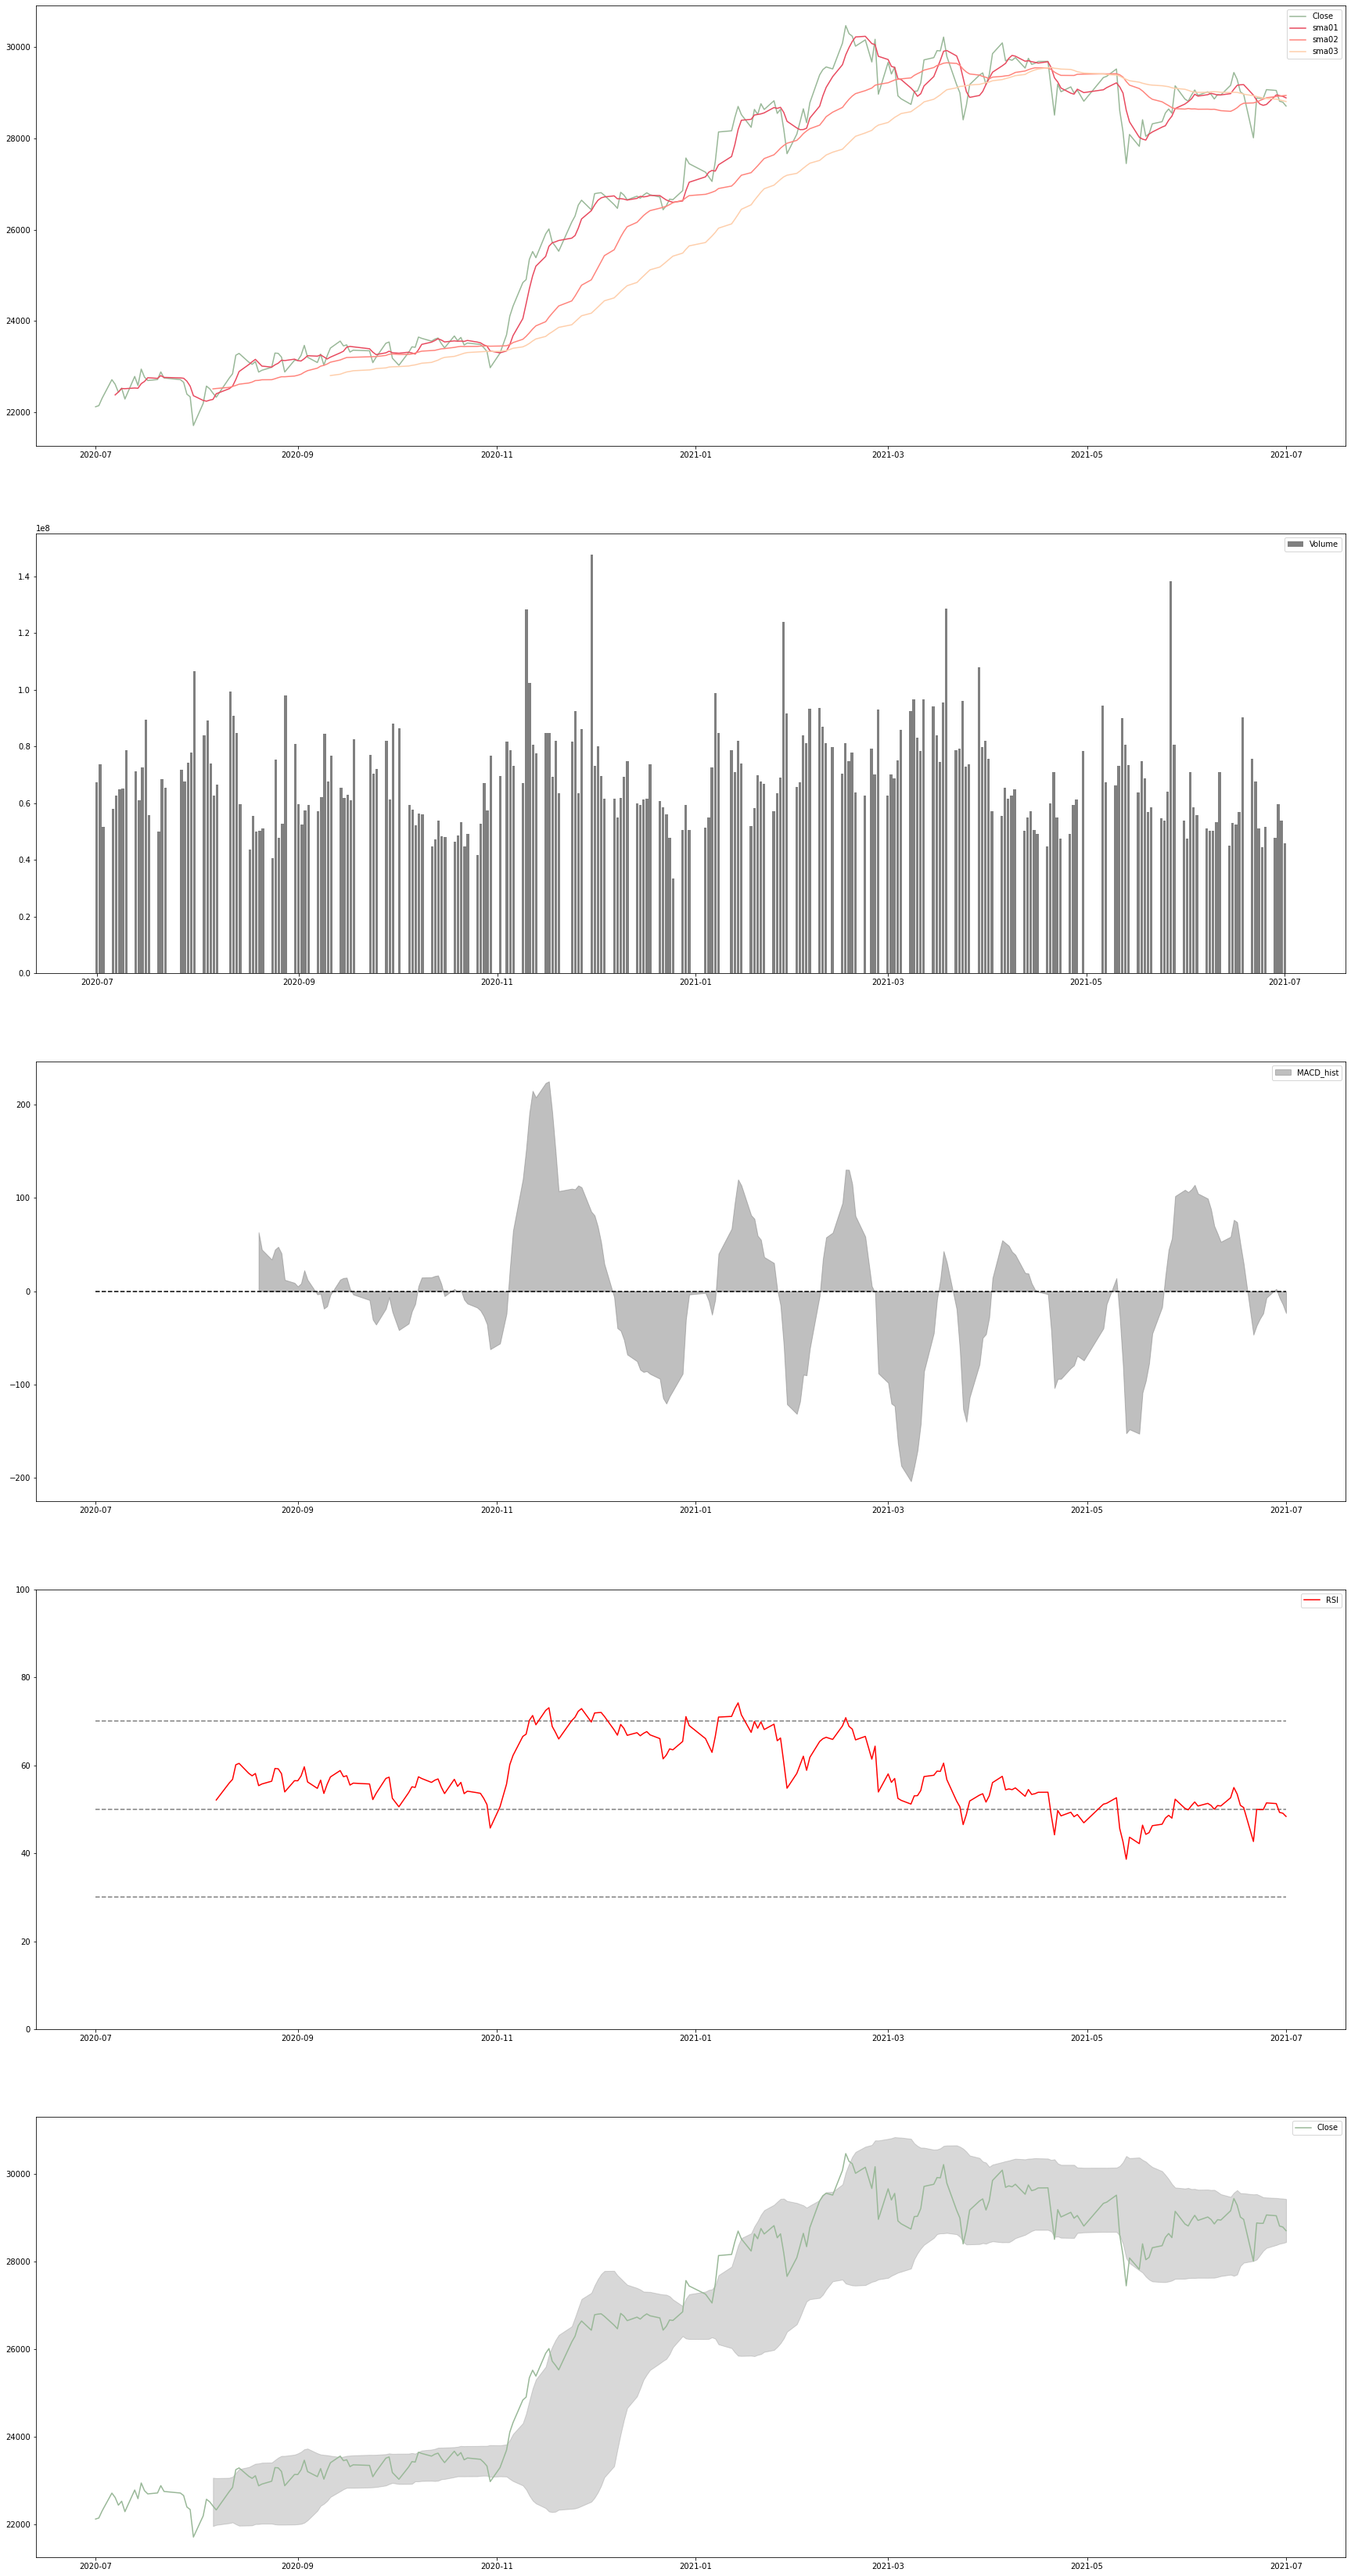

In [56]:
#チャート色んなの
plt.figure(figsize=(30, 60))

plt.subplot(5,1,1)##移動平均線
plt.plot(date, close,label='Close', color= '#99b898')
plt.plot(date, df['sma01'],label= 'sma01',color= '#e84a5f')
plt.plot(date, df['sma02'],label= 'sma02',color= '#ff847c')
plt.plot(date, df['sma03'],label= 'sma03',color= '#feceab')
plt.legend()

plt.subplot(5,1,2)##出来高ヒストグラム
plt.bar(date, df['Volume'],label= 'Volume',color= 'grey')
plt.legend()

plt.subplot(5,1,3)##MACD
plt.fill_between(date, df['macdhist'], color= 'grey', alpha= 0.5, label= 'MACD_hist')
plt.hlines(0,date[0],date[-1],'black',linestyles='dashed')
plt.legend()

plt.subplot(5,1,4)##RSI
plt.plot(date, df['RSI'], label= 'RSI',color= 'red')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], date[0], date[-1], "gray", linestyles="dashed")
plt.legend()

plt.subplot(5,1,5)##B-BAND
plt.plot(date, close, label = 'Close', color = '#99b898')
plt.fill_between(date, df['upper'],df['lower'], color = 'gray', alpha = 0.3)
plt.legend()